In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

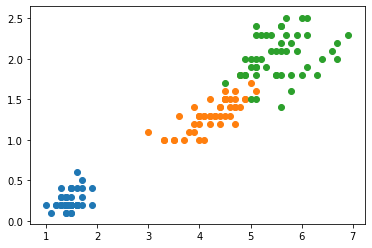

In [34]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
dt_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [36]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100))
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

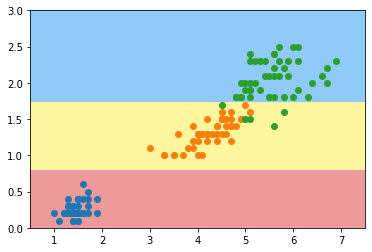

In [37]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

[Text(133.92000000000002, 181.2, 'X[1] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]')]

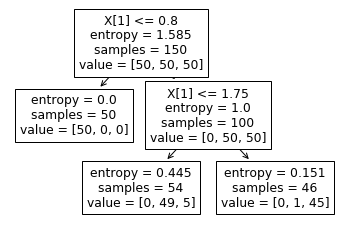

In [38]:
from sklearn import tree

tree.plot_tree(dt_clf)

### Exercise 1

+ criterion: gini and entropy are 2 different functions to measure the quality of a split. The CART algorithm uses gini while the ID3 chooses entropy. "gini" is from the statistics and "entropy" is from the information theory.
+ splitter: "best" and "random" to choose either the best split or the best random split. "best" is suitable for small size of samples. "random" is suitable for large dataset. "random" may introduce some bias and reduce variance.
+ max_depth: The larger of the max depth, the larger of the generated tree. This parameter is to limit the memory cost if the dataset is very large. A small value can introduce some bias and reduce variance.
+ min_samples_split: This parameter limits the subtrees to continue splitting. This parameter is to limit the memory cost if the dataset is very large. A value larger than 2 or a float larger than 0 can introduce some bias and reduce variance.
+ min_samples_leaf: This parameter can smooth the model. A value larger than 1 or a float larger than 0 can introduce some bias and reduce variance.
+ min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. A value larger than 0 can introduce some bias and reduce variance, especially when many samples have missing values or sample_weight is set.
+ max_features: The max number of features when looking for the best split. It can reduce the generation time of decision tree. The smaller of this value, the smaller of variance.
+ random_state: The random seed.
+ max_leaf_nodes: The maximum number of leaves. Setting this value could reduce some variance especially for many features.
+ min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value. A value larger than 0 can reduce some variance.
+ min_impurity_split: If the impurity of a node is smaller than this value, the node becomes a leaf. A value larger than 1e-7 can reduce some variance.
+ class_weight: A dict, balanced or None. This parameter is to specify the weight of classes in order to balance the classes. A value other than None can reduce some variance if the samples are very unbalanced.
+ presort: Set True to presort the data. Presort can reduce time cost if the dataset is relatively small.

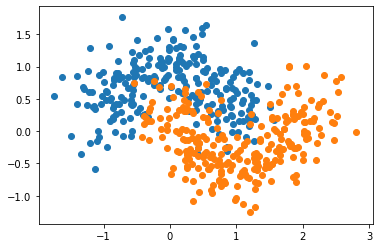

In [39]:
X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [40]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=300,
    max_samples=300,
    bootstrap=True,
    oob_score=True
)
bagging_clf.fit(X, y)
bagging_clf.oob_score_

0.908

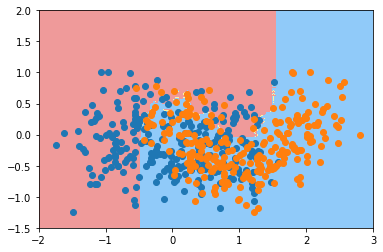

In [41]:
plot_decision_boundary(bagging_clf, axis=[-2, 3, -1.5, 2])
plt.scatter(X[y==0, 0], X[y==1, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

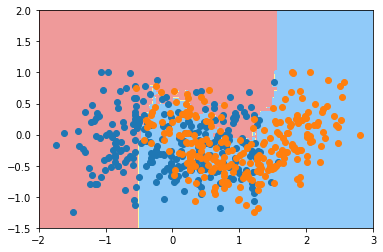

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=300,
    random_state=666,
    oob_score=True
)
rf_clf.fit(X, y)

plot_decision_boundary(rf_clf, axis=[-2, 3, -1.5, 2])
plt.scatter(X[y==0, 0], X[y==1, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

### Exercise 2

+ base_estimator: Use a base estimator to fit on random subsets of the dataset. if None, then use a decision tree.
+ n_estimators: The number of base estimators in the ensemble. A larger value has higher bias and smaller variance.
+ max_samples: The number of samples to draw from X to train each base estimator. A smaller value has higher bias and smaller variance.
+ max_features: The number of features to draw from X to train each base estimator. A smaller value has higher bias and smaller variance.
+ bootstrap_features: Whether features are drawn with replacement. Using replacement is better for high randomness.
+ oob_score: Whether to use out-of-bag samples to estimate the generalization error.
+ warm_start: When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new ensemble.
+ n_jobs: The number of jobs to run in parallel for both fit and predict. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
+ random_state: The random seed.
+ verbose: Controls the verbosity when fitting and predicting.